### Random
numpy에 있는 sub-package 인 `random` package를 보도록 하자. 이 패키지 안에 있는 `seed()`와 `rand()`이다.

- `seed()`: random seed를 설정함으로써 simulation을 reproducible하게 해준다. argument는 아무 정수나 될 수 있다.  

- `rand()`: 랜덤 숫자를 설정한다. 만약 아무 argument가 설정되어 있지 않다면, 0에서 1사이의 실수가 나온다.  

In [78]:
import numpy as np

np.random.seed(1234123)
print(np.random.rand())

0.6056540155147582


랜덤 정수를 만들고 싶다면, `randint()`를 사용하면 된다. 1에서 6사이의 정수를 뽑고 싶다면, (1,7)를 안에 쓰면 된다.  

In [79]:
print(np.random.randint(1,7))

3


다음과 같은 상황을 생각해보자.  

> 0층에서부터 60층까지의 타워를 오르려고 한다. 주사위를 던져서 2 이하 숫자가 나오면 한층 내려가고, 3에서 5의 숫자가 나오면 한 칸 올라가고, 6이 나오면 주사위를 한 번 더 던져서 나온 숫자만큼 올라 간다.  

In [80]:
step = 0

dice = np.random.randint(1,7)

if dice <= 2 :
    step = step - 1
elif dice<= 5 :
    step = step +1
else :
    step = step + np.random.randint(1,7)

In [81]:
print(dice)

3


In [82]:
print(step)

1


각 단계마다 어떻게 변하는 지 보기로 하자. 그러기 위해서는 반복문이 쓰여야할 것이다.  한 번만으로 60층을 오를 수 없으니. 

In [83]:

random_walk = [0]

for x in range(100) :
    step= random_walk[x]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, -1, 0, 1, 0, -1, 4, 5, 6, 5, 6, 5, 6, 7, 8, 9, 10, 11, 12, 11, 10, 11, 13, 17, 20, 19, 24, 25, 26, 27, 28, 27, 26, 27, 28, 27, 28, 29, 30, 31, 32, 31, 32, 33, 34, 35, 38, 37, 36, 35, 36, 35, 34, 35, 36, 37, 36, 35, 36, 37, 36, 37, 38, 39, 38, 42, 43, 44, 43, 44, 45, 49, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 59, 60, 61, 62, 66, 65, 66, 65, 64, 65, 66, 67, 68, 69, 68, 67]


그런데 안타깝게도 이 건물에 지하는 없다. 따라서 땅으로 내려가지 않기 위해 이를 막아줘야 한다.  
`max()`를 써보도록 하자.  

In [84]:
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step= max(0,step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 0, 0, 0, 2, 3, 4, 7, 6, 5, 4, 5, 4, 3, 4, 3, 4, 3, 4, 5, 4, 3, 4, 5, 6, 7, 6, 7, 10, 11, 12, 11, 10, 9, 8, 9, 8, 9, 10, 9, 10, 12, 13, 14, 13, 14, 20, 19, 18, 17, 22, 23, 22, 21, 22, 21, 22, 23, 24, 30, 29, 35, 36, 37, 36, 35, 36, 37, 38, 37, 36, 37, 38, 39, 38, 41, 42, 43, 44, 43, 44, 45, 48, 49, 53, 52, 53, 52, 53, 54, 53, 54, 53, 54, 55, 61, 60, 59, 58, 57, 58]


이를 `plt.plot`를 통해 시각화 할 수 도 있다.  

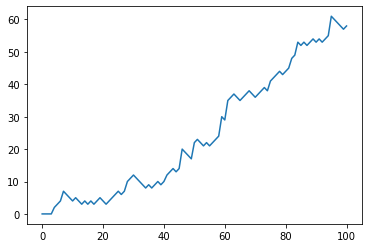

In [85]:
import matplotlib.pyplot as plt
plt.plot(random_walk)
plt.show()

`plt.plot()`이 자동적으로 `x`를 인덱스 넘버로 `y`를 value로 정한 것을 알 수 있다.  

그러나 이것은 한 번의 경우이므로 내가 내기에서 이길 지 질 지, 예측할 수 없다. 그렇기 위해서는 많은 시행이 필요하다.  

In [86]:

all_walks = []


for x in range(10):

    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    all_walks.append(random_walk)


list에 list가 있는 것을 확인 할 수 있다.  이를 numpy array로 바꾸어 plot를 만들어 보자.  

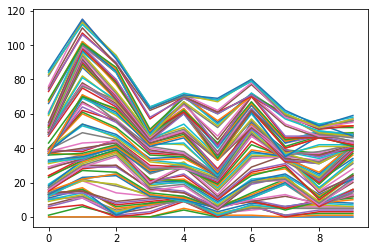

In [87]:
plt.plot(all_walks)
plt.show()

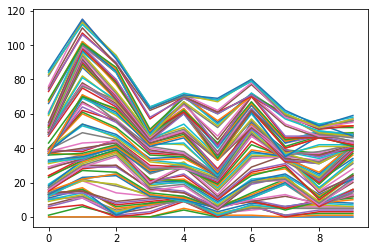

In [88]:
np_aw = np.array(all_walks)
plt.plot(np_aw)
plt.show()

In [89]:
print(np_aw)

[[  0   0   1 ...  83  84  85]
 [  0   0   6 ... 113 112 115]
 [  0   0   1 ...  94  93  92]
 ...
 [  0   0   1 ...  60  61  62]
 [  0   1   2 ...  52  54  53]
 [  0   1   2 ...  57  58  59]]


matrix로 표현하면

 $\begin{pmatrix}
  0 & 0 & 1 & \cdots & 83 & 84 & 85\\
  0 & 0 & 6 & \cdots & 113 & 112 & 115\\
  0 & 0 & 1 & \cdots & 94 & 93 & 92\\
  \vdots  & \vdots  & \ddots & \vdots  \\
  0 & 0 & 1 & \cdots & 60 & 61 & 62\\
  0 & 1 & 2 & \cdots & 52 & 54 & 53\\
  0 & 1 & 2 & \cdots & 57 & 58 & 59\\
 \end{pmatrix}$

하나의 column이 하나의 plot으로 그려진것을 확인할 수 있다.
그러니까 이 그래프는 처음 주사위 던졌을 때를 모아둔 거, 두번째 주사위를 던져서 모아둔거,,,,,마지막 주사위를 던져서 모아둔 그래프이다.   

내가 알고 싶은 것은 한 사건 내에서 처음 주사위 두번째 주사위,,,마지막 주사위다. 
그러기 위해서는 transpose하면 된다.   

matrix로 표현하면

 $\begin{pmatrix}
  0 & 0 & \cdots & 0 & 0 & 0\\
  0 & 0 & \cdots & 0 & 1 & 1\\
  1 & 6 & \cdots & 1 & 2 & 2\\
  \vdots  & \vdots  & \ddots & \vdots  \\
  83 & 113 & \cdots & 60 & 52 & 57\\
  84 & 112 & \cdots & 61 & 54 & 58\\
  85 & 115 & \cdots & 62 & 53 & 59\\
 \end{pmatrix}$


[ 0  0  1  5  6  7 11 10  9 10 11 12 13 14 13 14 13 14 13 12 13 15 16 15
 16 17 16 17 18 19 18 24 23 24 29 28 29 32 31 32 33 37 36 39 38 37 38 39
 40 39 38 39 40 39 38 37 38 37 36 37 36 37 43 47 48 49 50 51 50 49 50 49
 48 49 48 49 50 51 52 53 54 53 52 53 54 55 61 60 59 60 66 67 68 73 74 75
 76 82 83 84 85]


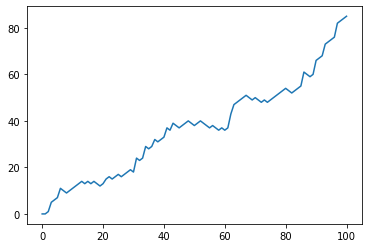

In [90]:
collum1=np_aw[0,:]
print(collum1)

plt.plot(collum1)
plt.show()

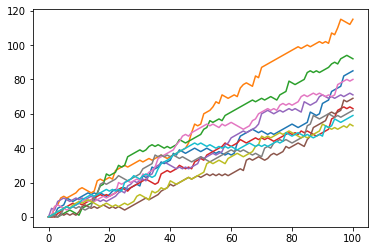

In [91]:
np_aw_t = np.transpose(np_aw)
plt.plot(np_aw_t)
plt.show()

In [92]:
print(np_aw_t)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   1   1]
 [  1   6   1 ...   1   2   2]
 ...
 [ 83 113  94 ...  60  52  57]
 [ 84 112  93 ...  61  54  58]
 [ 85 115  92 ...  62  53  59]]


matrix로 표현하면

 $\begin{pmatrix}
  0 & 0 & \cdots & 0 & 0 & 0\\
  0 & 0 & \cdots & 0 & 1 & 1\\
  1 & 6 & \cdots & 1 & 2 & 2\\
  \vdots  & \vdots  & \ddots & \vdots  \\
  83 & 113 & \cdots & 60 & 52 & 57\\
  84 & 112 & \cdots & 61 & 54 & 58\\
  85 & 115 & \cdots & 62 & 53 & 59\\
 \end{pmatrix}$

500번 시뮬레이션 하고 결과가 끝났을 때 몇 층에 있는지의 분포를 알고 싶다.  

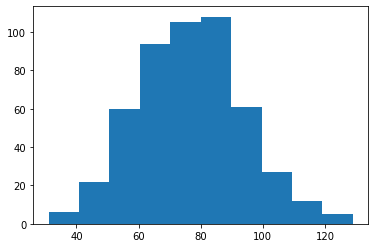

In [97]:
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)
    all_walks.append(random_walk)

np_aw_t = np.transpose(np.array(all_walks))

ends = np_aw_t[-1,:]

plt.hist(ends)
plt.show()

이제 이 내기를 하는게 유리한지 체크해보자. 

In [98]:
np.mean(ends>= 60)

0.844

84프로로 상당히 유리한 것을 알 수 있다.  